In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from itables import show
sns.set_theme(rc={"figure.dpi": 96})

In [3]:
# Load the example seaice dataset
seaice = sns.load_dataset("seaice")

# Add some other date variables
seaice["decade"] = seaice["Date"].dt.year.round(-1)
seaice["day_of_year"] = seaice["Date"].dt.dayofyear
seaice["month"] = seaice["Date"].dt.month_name()
seaice["year"] = seaice["Date"].dt.year

# Exclude years before 1989
seaice = seaice[seaice['year'] >= 1989]

# Add indicator for most recent year
seaice["most_recent"] = seaice["year"] == max(seaice["year"])

In [4]:
#| include: false
seaice

,Date,Extent,decade,day_of_year,month,year,most_recent
1853,1989-01-01,14.261,1990,1,January,1989,False
1854,1989-01-02,14.313,1990,2,January,1989,False
1855,1989-01-03,14.402,1990,3,January,1989,False
1856,1989-01-04,14.417,1990,4,January,1989,False
1857,1989-01-05,14.381,1990,5,January,1989,False
...,...,...,...,...,...,...,...
13170,2019-12-27,12.721,2020,361,December,2019,True
13171,2019-12-28,12.712,2020,362,December,2019,True
13172,2019-12-29,12.780,2020,363,December,2019,True
13173,2019-12-30,12.858,2020,364,December,2019,True


In [5]:
average_extent_by_year = seaice.groupby('year').agg({'Extent': 'mean', 'most_recent': 'first'}).reset_index()

overall_average = average_extent_by_year.groupby("most_recent").mean()
[avg_historical, avg_most_recent] = overall_average["Extent"].values

## Row {height=50%}

### Column

In [6]:
#| component: valuebox
#| title: "Most Recent Year Average Extent"
dict(
    color = sns.color_palette().as_hex()[1],
    icon = "clock",
    value = round(avg_most_recent, 1)
)

{'color': '#dd8452', 'icon': 'clock', 'value': 10.2}

In [7]:
#| component: valuebox
#| title: "Historical Average Extent"
dict(
    color = sns.color_palette().as_hex()[0],
    icon = "calendar3",
    value = round(avg_historical, 1)
)

{'color': '#4c72b0', 'icon': 'calendar3', 'value': 11.2}

### Column {width=80%}

<Axes: xlabel='Date', ylabel='Extent'>

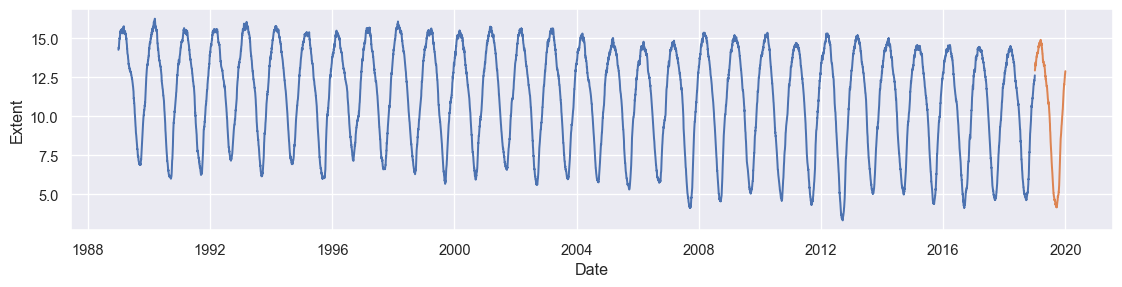

In [8]:
#| title: Sea Ice Extent 
plt.rcParams['figure.figsize'] = (14, 3)
sns.lineplot(data=seaice,
    x="Date", y="Extent", hue = "most_recent", legend = None
)

## Row

### Column {width=40%}

[Text(0.5, 0, 'Day of the Year')]

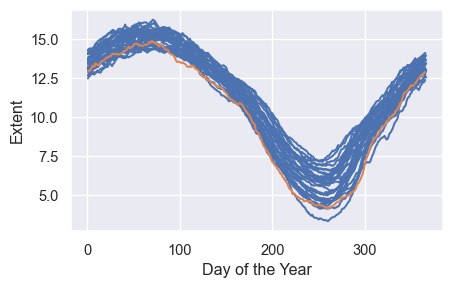

In [9]:
#| title: Seasonal Variation in Extent
plt.rcParams['figure.figsize'] = (5, 3)
sns.lineplot(data=seaice,
    x="day_of_year", y="Extent", units="year", hue="most_recent",
    estimator=None, legend = None
).set(xlabel="Day of the Year")

### Column {width=25%}

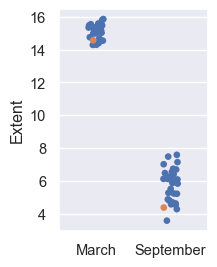

In [10]:
#| title: Average in March and September
seaice_extremes = seaice[(seaice['month'] == "March") | (seaice['month'] == "September")]
extent_extremes = seaice_extremes.groupby(['year', 'month', 'most_recent']).mean().reset_index()

plt.rcParams['figure.figsize'] = (2, 3)
sns.stripplot(extent_extremes, 
    x="month", y="Extent", hue = "most_recent",
    legend=None
).set(xlabel=None)
plt.show()

In [11]:
extent_sorted = extent_extremes.sort_values(by = "Extent")
mar = extent_sorted[extent_sorted["month"] == "March"]
sep = extent_sorted[extent_sorted["month"] == "September"]

### Column {.tabset}

In [12]:
#| title: March Average
from itables import show
show(mar[["year", "Extent"]].style.format(precision = 2, subset = "Extent"), dom="tpr", showIndex = False)

year,Extent
2017,14.29
2018,14.30
2015,14.37
2016,14.40
2006,14.42
2007,14.54
2011,14.55
2019,14.57
2005,14.69
2014,14.76


In [13]:
#| title: September Average
show(sep[["year", "Extent"]].style.format(precision = 2, subset = "Extent"), dom="tpr", showIndex = False)

year,Extent
2012,3.57
2007,4.27
2019,4.36
2016,4.53
2011,4.56
2015,4.62
2008,4.69
2018,4.79
2017,4.82
2010,4.87
